In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('wind_dataset.csv', encoding='unicode escape')

In [6]:
df.shape

(6574, 9)

In [10]:
df.head(6576)

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5
...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0
6570,1978-12-28,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0
6571,1978-12-29,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2
6572,1978-12-30,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


<-----------------------Question 1----------------------------->

--Are there any missing values in the dataset? If so, how will you handle them?

--How is the wind speed distributed in the dataset?

--Are there any outliers or extreme values?

In [12]:
pd.isnull(df).sum()

DATE         0
WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
dtype: int64

In [5]:
import pandas as pd
df=pd.read_csv('wind_dataset.csv', encoding='unicode escape')
df['IND.1']=df['IND.1'].fillna(0.39)
df['IND.2']=df['IND.2'].fillna(0.46)
df['T.MAX']=df['T.MAX'].fillna(13.33)
df['T.MIN']=df['T.MIN'].fillna(6.41)
df['T.MIN.G']=df['T.MIN.G'].fillna(2.73)

In [6]:
df.isna().sum().sum()

0

Mean: 9.682296913799219
Median: 9.08
Standard Deviation: 4.938009253046855
Minimum Speed: 0.0
Maximum Speed: 30.37


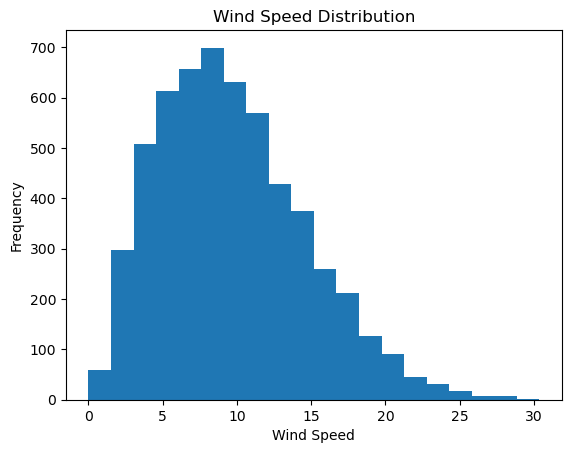

In [49]:
wind_speed = df['WIND']

mean_speed = wind_speed.mean()
median_speed = wind_speed.median()
std_dev = wind_speed.std()
min_speed = wind_speed.min()
max_speed = wind_speed.max()

print(f"Mean: {mean_speed}")
print(f"Median: {median_speed}")
print(f"Standard Deviation: {std_dev}")
print(f"Minimum Speed: {min_speed}")
print(f"Maximum Speed: {max_speed}")

plt.hist(wind_speed, bins=20)
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.title('Wind Speed Distribution')
plt.show()



In [7]:
df['WIND'].describe()

count    6574.000000
mean        9.796834
std         4.977272
min         0.000000
25%         6.000000
50%         9.210000
75%        12.960000
max        30.370000
Name: WIND, dtype: float64

<Axes: >

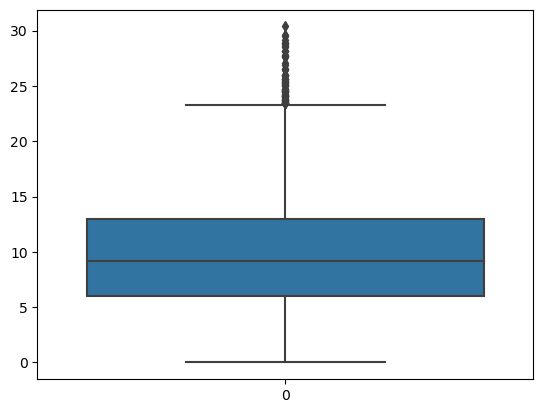

In [8]:
import seaborn as sns
sns.boxplot(df['WIND'])

In [11]:
wind_speed = df['WIND']
mean_speed = wind_speed.mean()
median_speed = wind_speed.median()
std_dev = wind_speed.std()
min_speed = wind_speed.min()
max_speed = wind_speed.max()

z_scores = (wind_speed - mean_speed) / std_dev
outliers = wind_speed[abs(z_scores) > 3]

print("Outliers:")
print(outliers)

Outliers:
344     25.62
375     25.96
402     25.00
407     29.54
411     28.84
421     25.62
422     26.87
430     29.58
539     25.29
713     28.91
728     28.79
729     27.79
1045    25.92
1477    28.50
1567    27.08
1765    29.17
1780    27.58
1781    25.33
1911    28.62
2160    30.37
2161    28.16
2167    25.12
2176    26.00
2236    26.54
2260    26.54
2266    25.25
2971    27.71
4049    25.04
4401    25.12
5098    25.46
5109    25.33
5497    25.96
5934    25.62
5955    26.42
6161    28.16
6237    25.54
6258    27.71
Name: WIND, dtype: float64


Summarizing your analysis and observation
-- We have replaced the missing values with the mean of that feature..

-- Minimum Outlier Value: 24.50

This is the lowest outlier value for the 'WIND' variable. It indicates that there are some observations with unusually low wind speed.
Maximum Outlier Value: 30.37

This is the highest outlier value for the 'WIND' variable. It suggests the presence of observations with unusually high wind speed.
Total Number of Outliers: 34


<-----------------------Question 2----------------------------->

--How does the wind speed vary over time?

--Can you visualize any trends or patterns using line plots or time series analysis?

In [13]:
df['DATE'] = pd.to_datetime(df['DATE'])

df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month

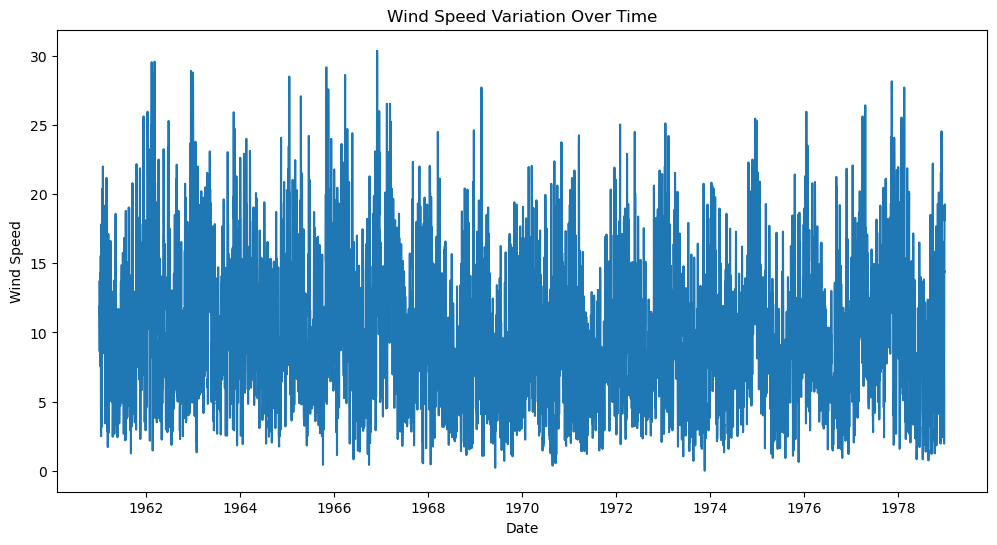

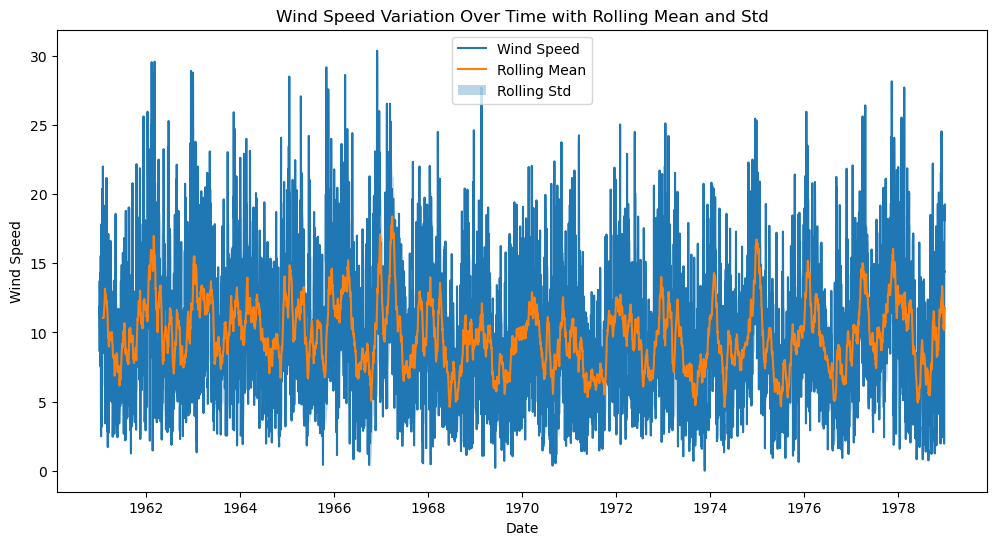

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.plot(df['DATE'], df['WIND'])
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.title('Wind Speed Variation Over Time')
plt.show()

window = 30  
rolling_mean = df['WIND'].rolling(window=window).mean()
rolling_std = df['WIND'].rolling(window=window).std()

plt.figure(figsize=(12, 6))
plt.plot(df['DATE'], df['WIND'], label='Wind Speed')
plt.plot(df['DATE'], rolling_mean, label='Rolling Mean')
plt.fill_between(df['DATE'], rolling_mean - rolling_std, rolling_mean + rolling_std, alpha=0.3, label='Rolling Std')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.title('Wind Speed Variation Over Time with Rolling Mean and Std')
plt.legend()
plt.show()

<-----------------------Question 3----------------------------->

--Are there any seasonal patterns in wind speed or other weather variables?

--Analyze and visualize these patterns using seasonal decomposition or seasonal subseries plots?

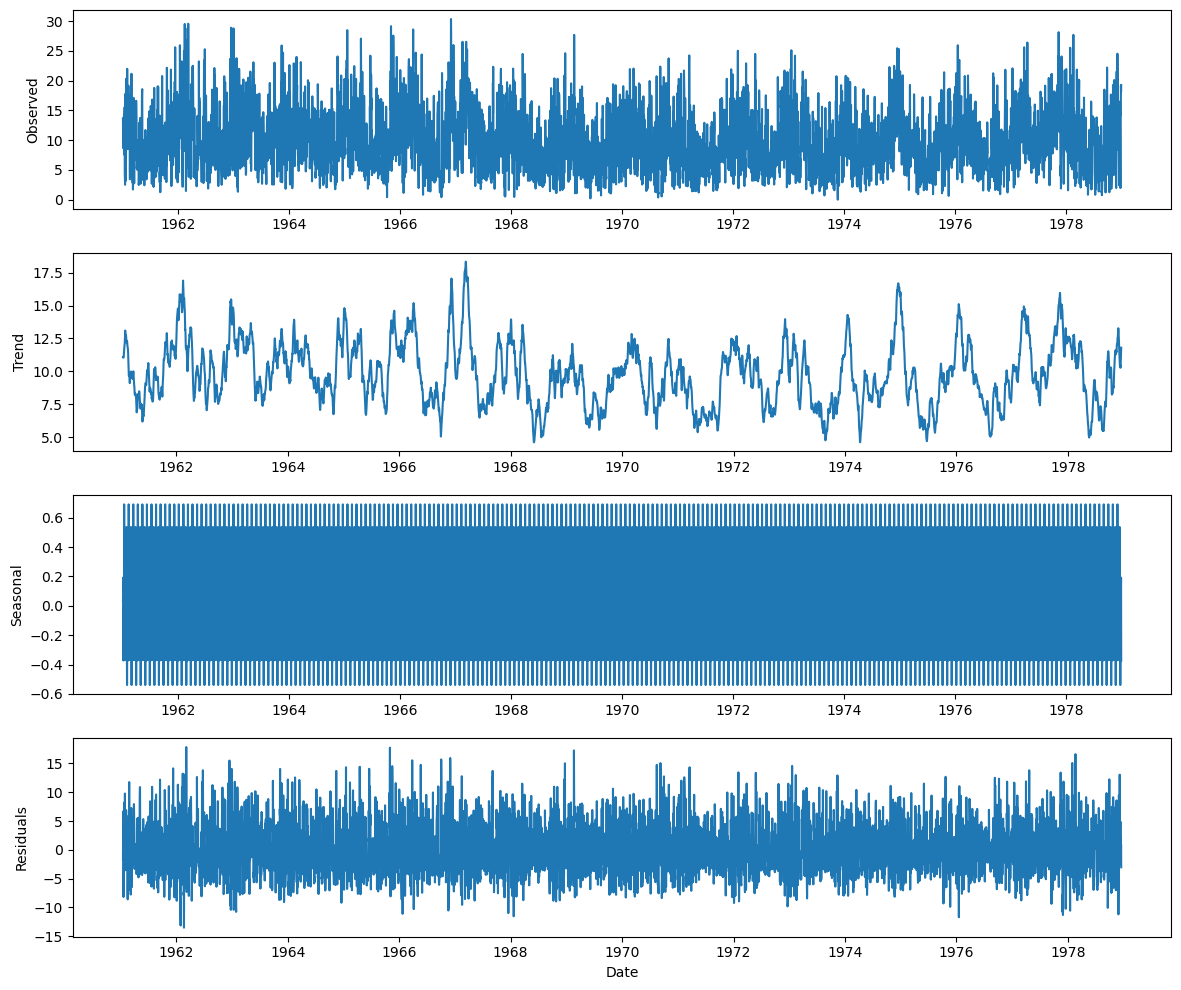

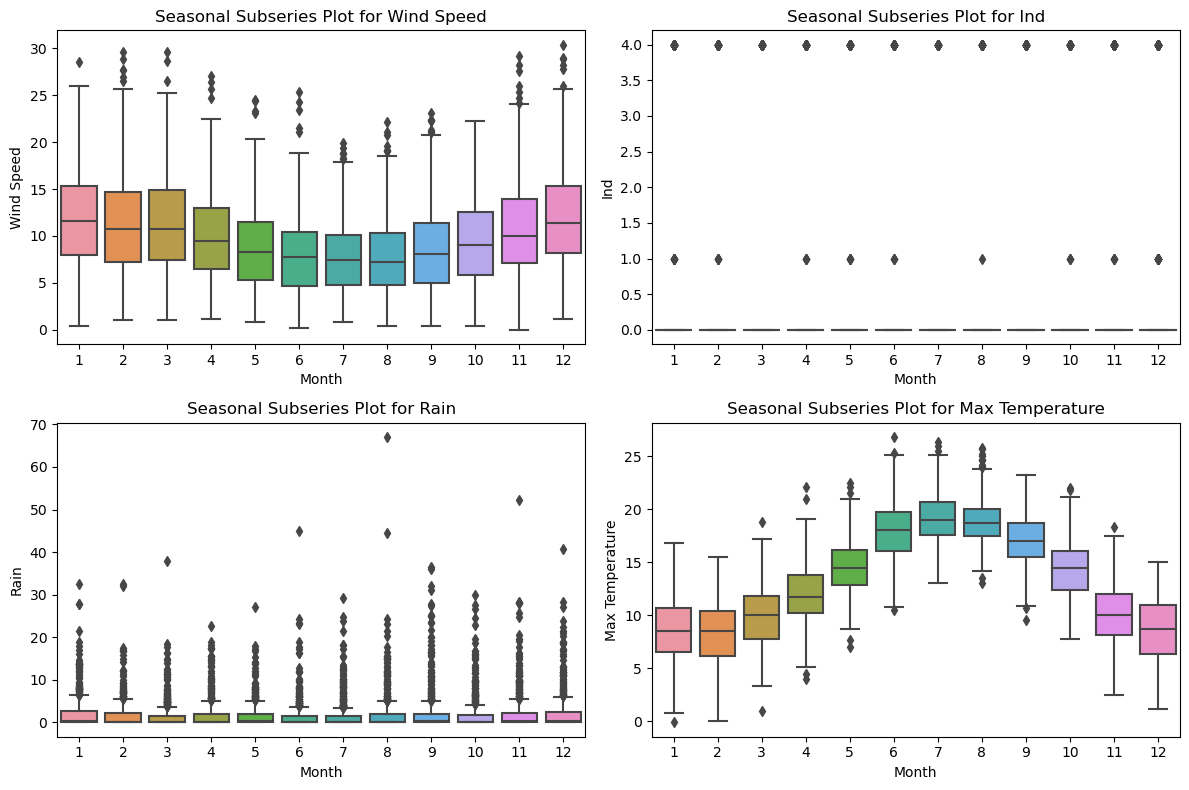

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv('wind_dataset.csv', encoding='unicode escape')
df['DATE'] = pd.to_datetime(df['DATE'])

decomposition = seasonal_decompose(df['WIND'], model='additive', period=30)  # Adjust the period according to your data frequency

plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(df['DATE'], decomposition.observed)
plt.ylabel('Observed')
plt.subplot(412)
plt.plot(df['DATE'], decomposition.trend)
plt.ylabel('Trend')
plt.subplot(413)
plt.plot(df['DATE'], decomposition.seasonal)
plt.ylabel('Seasonal')
plt.subplot(414)
plt.plot(df['DATE'], decomposition.resid)
plt.ylabel('Residuals')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))
plt.subplot(221)
sns.boxplot(x=df['DATE'].dt.month, y=df['WIND'])
plt.xlabel('Month')
plt.ylabel('Wind Speed')
plt.title('Seasonal Subseries Plot for Wind Speed')

plt.subplot(222)
sns.boxplot(x=df['DATE'].dt.month, y=df['IND'])
plt.xlabel('Month')
plt.ylabel('Ind')
plt.title('Seasonal Subseries Plot for Ind')

plt.subplot(223)
sns.boxplot(x=df['DATE'].dt.month, y=df['RAIN'])
plt.xlabel('Month')
plt.ylabel('Rain')
plt.title('Seasonal Subseries Plot for Rain')

plt.subplot(224)
sns.boxplot(x=df['DATE'].dt.month, y=df['T.MAX'])
plt.xlabel('Month')
plt.ylabel('Max Temperature')
plt.title('Seasonal Subseries Plot for Max Temperature')

plt.tight_layout()
plt.show()

<-----------------------Question 4----------------------------->

--What is the distribution of other weather variables such as precipitation amount, maximum temperature, minimum temperature, and grass minimum temperature?

-- Visualize their distributions using histograms or density plots.

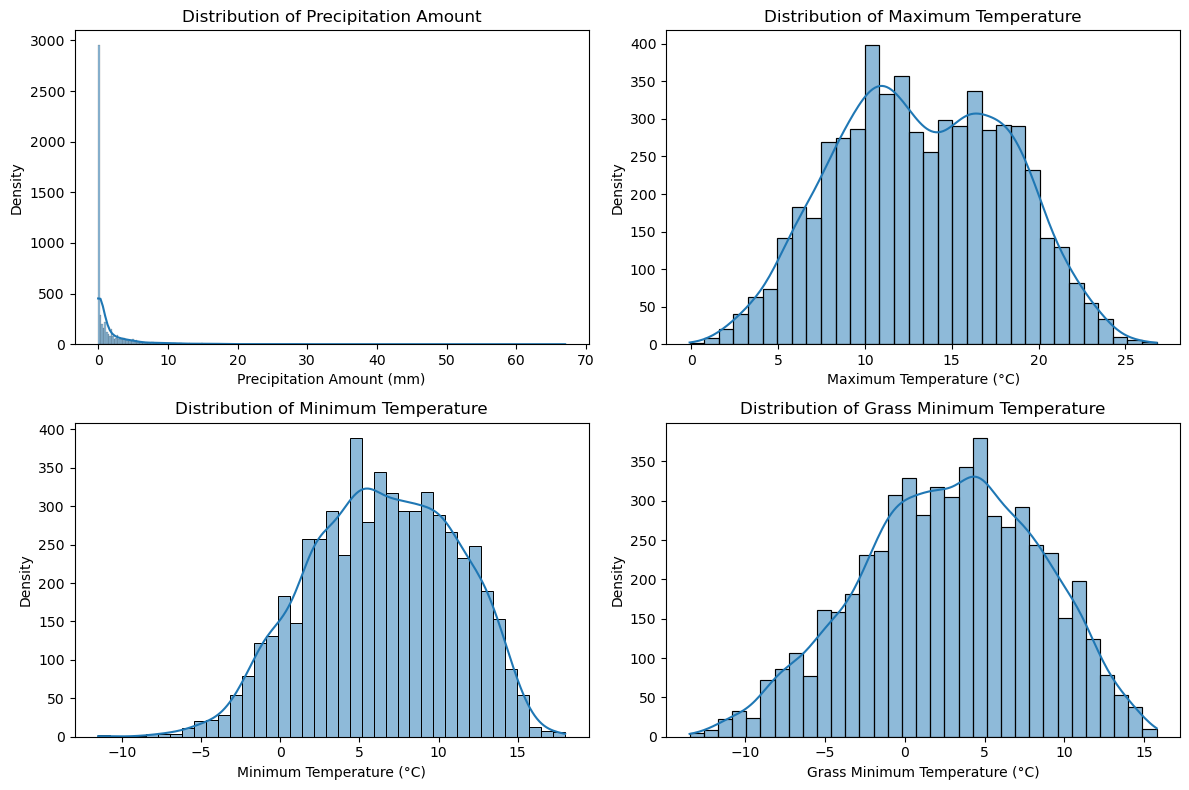

In [38]:
plt.figure(figsize=(12, 8))

# Precipitation Amount (RAIN)
plt.subplot(221)
sns.histplot(data['RAIN'], kde=True)
plt.xlabel('Precipitation Amount (mm)')
plt.ylabel('Density')
plt.title('Distribution of Precipitation Amount')

# Maximum Temperature (T.MAX)
plt.subplot(222)
sns.histplot(data['T.MAX'], kde=True)
plt.xlabel('Maximum Temperature (°C)')
plt.ylabel('Density')
plt.title('Distribution of Maximum Temperature')

# Minimum Temperature (T.MIN)
plt.subplot(223)
sns.histplot(data['T.MIN'], kde=True)
plt.xlabel('Minimum Temperature (°C)')
plt.ylabel('Density')
plt.title('Distribution of Minimum Temperature')

# Grass Minimum Temperature (T.MIN.G)
plt.subplot(224)
sns.histplot(data['T.MIN.G'], kde=True)
plt.xlabel('Grass Minimum Temperature (°C)')
plt.ylabel('Density')
plt.title('Distribution of Grass Minimum Temperature')

plt.tight_layout()
plt.show()

<-----------------------Question 5----------------------------->

--Extract any additional features from the given dataset that may be relevant for wind speed prediction?

-- HINT- For example, you could calculate daily or monthly averages, differences, or time lags of the weather variables.

In [40]:
data.set_index('DATE', inplace=True)

data['WIND_DAILY_AVG'] = data['WIND'].resample('D').mean()
data['RAIN_DAILY_AVG'] = data['RAIN'].resample('D').mean()
data['T.MAX_DAILY_AVG'] = data['T.MAX'].resample('D').mean()
data['T.MIN_DAILY_AVG'] = data['T.MIN'].resample('D').mean()

data['WIND_DIFF'] = data['WIND'].diff()
data['RAIN_DIFF'] = data['RAIN'].diff()
data['T.MAX_DIFF'] = data['T.MAX'].diff()
data['T.MIN_DIFF'] = data['T.MIN'].diff()

lags = [1, 2, 3]  
for lag in lags:
    data[f'WIND_LAG_{lag}'] = data['WIND'].shift(lag)
    data[f'RAIN_LAG_{lag}'] = data['RAIN'].shift(lag)
    data[f'T.MAX_LAG_{lag}'] = data['T.MAX'].shift(lag)
    data[f'T.MIN_LAG_{lag}'] = data['T.MIN'].shift(lag)

print(data.head())

             WIND  IND  RAIN  IND.1  T.MAX  IND.2  T.MIN  T.MIN.G  \
DATE                                                                
1961-01-01  13.67    0   0.2    0.0    9.5    0.0    3.7     -1.0   
1961-01-02  11.50    0   5.1    0.0    7.2    0.0    4.2      1.1   
1961-01-03  11.25    0   0.4    0.0    5.5    0.0    0.5     -0.5   
1961-01-04   8.63    0   0.2    0.0    5.6    0.0    0.4     -3.2   
1961-01-05  11.92    0  10.4    0.0    7.2    1.0   -1.5     -7.5   

            WIND_DAILY_AVG  RAIN_DAILY_AVG  ...  T.MAX_LAG_1  T.MIN_LAG_1  \
DATE                                        ...                             
1961-01-01           13.67             0.2  ...          NaN          NaN   
1961-01-02           11.50             5.1  ...          9.5          3.7   
1961-01-03           11.25             0.4  ...          7.2          4.2   
1961-01-04            8.63             0.2  ...          5.5          0.5   
1961-01-05           11.92            10.4  ...       

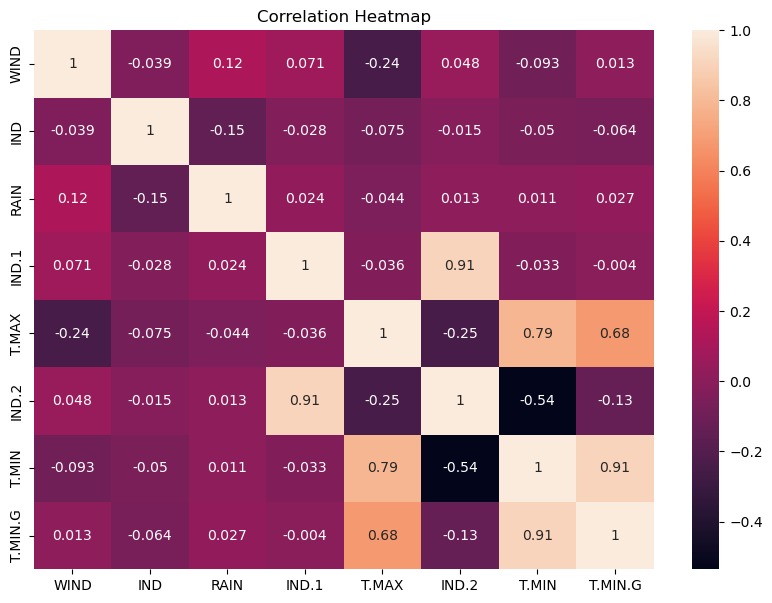

In [8]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Correlation Heatmap')
plt.show()

Summarizing your analysis and observation

As we can observe clearly from the above heatmap that the wind is more positively correlated to rain(0.12)

TASK 2 - Classification/Regression
Perform following steps on the same dataset which you used for EDA.

Data Preprocessing (as per requirement)
Feature Engineering
Split dataset in train-test (80:20 ratio)
Model selection
Model training
Model evaluation
Fine-tune the Model
Make predictions
Summarize your model's performance by evaluation metrices

<----------Feature Engineering----------->

In [13]:
df=pd.read_csv('wind_dataset.csv', encoding='unicode escape')
df=df.drop(columns=['DATE','IND','IND.1','IND.2'])

In [15]:
df.head()

,WIND,RAIN,T.MAX,T.MIN,T.MIN.G
0,13.67,0.2,9.5,3.7,-1.0
1,11.50,5.1,7.2,4.2,1.1
2,11.25,0.4,5.5,0.5,-0.5
3,8.63,0.2,5.6,0.4,-3.2
4,11.92,10.4,7.2,-1.5,-7.5


In [16]:
X=df.drop(columns=['WIND'])
X

,RAIN,T.MAX,T.MIN,T.MIN.G
0,0.2,9.5,3.7,-1.0
1,5.1,7.2,4.2,1.1
2,0.4,5.5,0.5,-0.5
3,0.2,5.6,0.4,-3.2
4,10.4,7.2,-1.5,-7.5
...,...,...,...,...
6569,16.8,9.8,4.0,0.0
6570,16.0,9.1,8.5,8.0
6571,14.7,5.0,3.5,3.2
6572,4.9,2.9,0.3,-0.5


In [17]:
Y=df['WIND']
Y

0       13.67
1       11.50
2       11.25
3        8.63
4       11.92
        ...  
6569    14.46
6570    14.33
6571    19.17
6572    18.08
6573    19.25
Name: WIND, Length: 6574, dtype: float64

In [18]:
X.shape ,Y.shape

((6574, 4), (6574,))

<----------Splitting the data------------>

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape , Y_train.shape
X_test.shape , Y_test.shape

((1315, 4), (1315,))

<-----------Model Selection and Training---------->
Linear regression model is selected to interpret continous wind speed

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer


data = pd.read_csv('Wind_dataset.csv')
df = pd.DataFrame(data) 


print(df.isnull().sum())

df = df.dropna()

df = df.drop('DATE', axis=1)

df = df.apply(pd.to_numeric, errors='coerce')

imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df)

df_imputed = pd.DataFrame(df_imputed, columns=df.columns)


X = df_imputed.drop('T.MIN.G', axis=1)  # Features
y = df_imputed['T.MIN.G']  # Target variable

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

#  Model selection
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor()
}

#  Train and evaluate models
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    mse = mean_squared_error(y_val, y_pred)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    results[model_name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R-squared': r2
    }


best_model = min(results, key=lambda x: results[x]['RMSE'])
print('Best Model:', best_model)
print('Validation Results:')
print(results[best_model])

final_model = models[best_model]
y_test_pred = final_model.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print('Test Results:')
print('MSE:', mse_test)
print('RMSE:', rmse_test)
print('MAE:', mae_test)
print('R-squared:', r2_test)

DATE         0
WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
dtype: int64
Best Model: Linear Regression
Validation Results:
{'MSE': 4.655835823243038, 'RMSE': 2.157738590108412, 'MAE': 1.7224425373043049, 'R-squared': 0.8535478203005549}
Test Results:
MSE: 4.832726714155586
RMSE: 2.198346359006148
MAE: 1.7622667156246565
R-squared: 0.8468980818719954
